In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop

import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Plot training & validation accuracy values: https://keras.io/visualization/#training-history-visualization
plt.rcParams['figure.figsize'] = (15.0, 5.0) # set default size of plots

In [5]:
#get consistent results
from keras.models import Sequential
from keras.layers import Dense
import numpy
from numpy.random import seed
seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

# Regresja

Dataset: https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices

### Przygotowywanie danych

In [18]:
# load the dataset
df = pd.read_csv(r"C:\Users\kuba2\Desktop\notebooks\neural_networks\lab01\kaggle_datasets\regression\diamond_prices.csv")

In [19]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [20]:
# remove redundant index column
df = df.drop(columns=['Unnamed: 0'], inplace=False)

In [15]:
df['cut'].value_counts()

Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: cut, dtype: int64

In [16]:
df['color'].value_counts()

G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [17]:
df['clarity'].value_counts()

SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

Wartości kolumn `cut`, `color`, `clarity` są typu `string`, więc aby przygotować je do uczenia trzeba zastosować one-hot encoding.

In [32]:
cut_one_hot = pd.get_dummies(df.cut, prefix='cut')
df_prepared = pd.concat([df, cut_one_hot], axis=1)

In [33]:
df_prepared

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0,0,1,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,0,0,0,1,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0,0,0,1,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,1,0
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,0,0,1,0,0
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,0,0,0,1,0
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,0,0,0,1,0


In [34]:
color_one_hot = pd.get_dummies(df.cut, prefix='color')
clarity_one_hot = pd.get_dummies(df.clarity, prefix='clarity')
df_prepared = pd.concat([df_prepared, color_one_hot, clarity_one_hot], axis=1)

In [37]:
df_prepared.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,...,color_Premium,color_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,0,1,0,0,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,1,0,0,0,1,0,0,0,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,0,0,0,0,0,1,0,0,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,0,0,0,0,1,0,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,0,0,0,0,1,0,0,0,0


In [44]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            53943 non-null  float64
 1   cut              53943 non-null  object 
 2   color            53943 non-null  object 
 3   clarity          53943 non-null  object 
 4   depth            53943 non-null  float64
 5   table            53943 non-null  float64
 6   price            53943 non-null  int64  
 7   x                53943 non-null  float64
 8   y                53943 non-null  float64
 9   z                53943 non-null  float64
 10  cut_Fair         53943 non-null  uint8  
 11  cut_Good         53943 non-null  uint8  
 12  cut_Ideal        53943 non-null  uint8  
 13  cut_Premium      53943 non-null  uint8  
 14  cut_Very Good    53943 non-null  uint8  
 15  color_Fair       53943 non-null  uint8  
 16  color_Good       53943 non-null  uint8  
 17  color_Ideal 

In [45]:
# Drop column replaced with one-hot encoding
df_prepared = df_prepared.drop(columns=['cut', 'color', 'clarity'])

In [47]:
df_prepared.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_Premium,color_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            53943 non-null  float64
 1   depth            53943 non-null  float64
 2   table            53943 non-null  float64
 3   price            53943 non-null  int64  
 4   x                53943 non-null  float64
 5   y                53943 non-null  float64
 6   z                53943 non-null  float64
 7   cut_Fair         53943 non-null  uint8  
 8   cut_Good         53943 non-null  uint8  
 9   cut_Ideal        53943 non-null  uint8  
 10  cut_Premium      53943 non-null  uint8  
 11  cut_Very Good    53943 non-null  uint8  
 12  color_Fair       53943 non-null  uint8  
 13  color_Good       53943 non-null  uint8  
 14  color_Ideal      53943 non-null  uint8  
 15  color_Premium    53943 non-null  uint8  
 16  color_Very Good  53943 non-null  uint8  
 17  clarity_I1  

#### Skalowanie danych

In [85]:
cols_to_scale = list(df_prepared.columns)
# it's not needed to scale the target value so it's removed from columns to scale
cols_to_scale.remove('price')
print(cols_to_scale)

['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_Fair', 'color_Good', 'color_Ideal', 'color_Premium', 'color_Very Good', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


In [86]:
normalized_df = df_prepared.copy()
# it's not needed to scale the target value
for column in cols_to_scale:
    normalized_df[column] = (df_prepared[column] - df_prepared[column].mean())/df_prepared[column].std()
normalized_df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_Premium,color_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198178,-0.174032,-1.099663,326,-1.587868,-1.536224,-1.571152,-0.175397,-0.316299,1.225974,...,-0.586115,-0.537259,-0.118016,-0.185261,-0.565392,2.206152,-0.422507,-0.542299,-0.269592,-0.321941
1,-1.240372,-1.360664,1.585442,326,-1.641356,-1.658805,-1.741201,-0.175397,-0.316299,-0.815663,...,1.706119,-0.537259,-0.118016,-0.185261,1.768651,-0.453270,-0.422507,-0.542299,-0.269592,-0.321941
2,-1.198178,-3.384918,3.375513,327,-1.498720,-1.457422,-1.741201,-0.175397,3.161507,-0.815663,...,-0.586115,-0.537259,-0.118016,-0.185261,-0.565392,-0.453270,2.366782,-0.542299,-0.269592,-0.321941
3,-1.071595,0.454185,0.242890,334,-1.364997,-1.317330,-1.287737,-0.175397,-0.316299,-0.815663,...,1.706119,-0.537259,-0.118016,-0.185261,-0.565392,-0.453270,-0.422507,1.843967,-0.269592,-0.321941
4,-1.029401,1.082402,0.242890,335,-1.240190,-1.212261,-1.117688,-0.175397,3.161507,-0.815663,...,-0.586115,-0.537259,-0.118016,-0.185261,-0.565392,2.206152,-0.422507,-0.542299,-0.269592,-0.321941


In [87]:
normalized_df.describe()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_Premium,color_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,5.394300e+04,5.394300e+04,5.394300e+04,53943.000000,5.394300e+04,5.394300e+04,5.394300e+04,5.394300e+04,5.394300e+04,5.394300e+04,...,5.394300e+04,5.394300e+04,5.394300e+04,5.394300e+04,5.394300e+04,5.394300e+04,5.394300e+04,5.394300e+04,5.394300e+04,5.394300e+04
mean,5.021159e-14,5.482716e-13,-1.469162e-14,3932.734294,1.061393e-13,8.035042e-14,-2.524664e-13,2.162144e-14,-1.241152e-14,-7.405967e-14,...,-1.546272e-14,1.869106e-14,2.208968e-14,-5.099850e-14,1.583913e-14,-7.929596e-14,1.153787e-14,2.195300e-15,-4.324925e-14,-6.080219e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,3989.338447,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.261469e+00,-1.308738e+01,-6.469874e+00,326.000000,-5.109215e+00,-5.021024e+00,-5.014642e+00,-1.753966e-01,-3.162990e-01,-8.156631e-01,...,-5.861146e-01,-5.372591e-01,-1.180161e-01,-1.852605e-01,-5.653921e-01,-4.532696e-01,-4.225067e-01,-5.422990e-01,-2.695923e-01,-3.219410e-01
25%,-8.395272e-01,-5.230411e-01,-6.521456e-01,950.000000,-9.103425e-01,-8.882969e-01,-8.909563e-01,-1.753966e-01,-3.162990e-01,-8.156631e-01,...,-5.861146e-01,-5.372591e-01,-1.180161e-01,-1.852605e-01,-5.653921e-01,-4.532696e-01,-4.225067e-01,-5.422990e-01,-2.695923e-01,-3.219410e-01
50%,-2.066139e-01,3.537389e-02,-2.046280e-01,2401.000000,-2.777681e-02,-2.147481e-02,-1.237047e-02,-1.753966e-01,-3.162990e-01,-8.156631e-01,...,-5.861146e-01,-5.372591e-01,-1.180161e-01,-1.852605e-01,-5.653921e-01,-4.532696e-01,-4.225067e-01,-5.422990e-01,-2.695923e-01,-3.219410e-01
75%,5.106879e-01,5.239870e-01,6.904073e-01,5324.000000,7.210668e-01,7.052548e-01,7.103372e-01,-1.753966e-01,-3.162990e-01,1.225974e+00,...,1.706119e+00,-5.372591e-01,-1.180161e-01,-1.852605e-01,-5.653921e-01,-4.532696e-01,-4.225067e-01,-5.422990e-01,-2.695923e-01,-3.219410e-01
max,8.886241e+00,1.204130e+01,1.680104e+01,18823.000000,4.465285e+00,4.655051e+01,4.004831e+01,5.701260e+00,3.161507e+00,1.225974e+00,...,1.706119e+00,1.861265e+00,8.473266e+00,5.397705e+00,1.768651e+00,2.206152e+00,2.366782e+00,1.843967e+00,3.709236e+00,3.106102e+00


#### Wyznaczanie zbioru testowego i treningowego

In [97]:
X, y = normalized_df.drop('price', axis=1), normalized_df['price']

# train_data, train_targets, test_data, test_targets = train_test_split(X, y, random_state=42)
# set how many rows to use 
data_size = 10000

# In the first step we will split the data in training and remaining dataset
train_data, rem_data, train_targets, rem_targets = train_test_split(X[:10000],y[:10000], train_size=0.8, random_state=42)
test_size=0.5
# split remaining data to test and validation sets
val_data, test_data, val_targets, test_targets = train_test_split(rem_data,rem_targets, test_size=test_size, random_state=42)

### Budowanie sieci

In [98]:
def build_model():
    # Because we will need to instantiate the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [100]:
model = build_model()
num_epochs = 150
history = model.fit(train_data, train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=16, verbose=0)

In [101]:
def plot_model_mae(mae_history, argmin=0):
    # smooth_mae_history = smooth_curve(average_mae_history[10:])
    # omit 10 becuase of different value scale 
    smooth_mae_history = mae_history[10:]
    plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
    plt.axvline(x=argmin, color='r', linewidth=2)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()

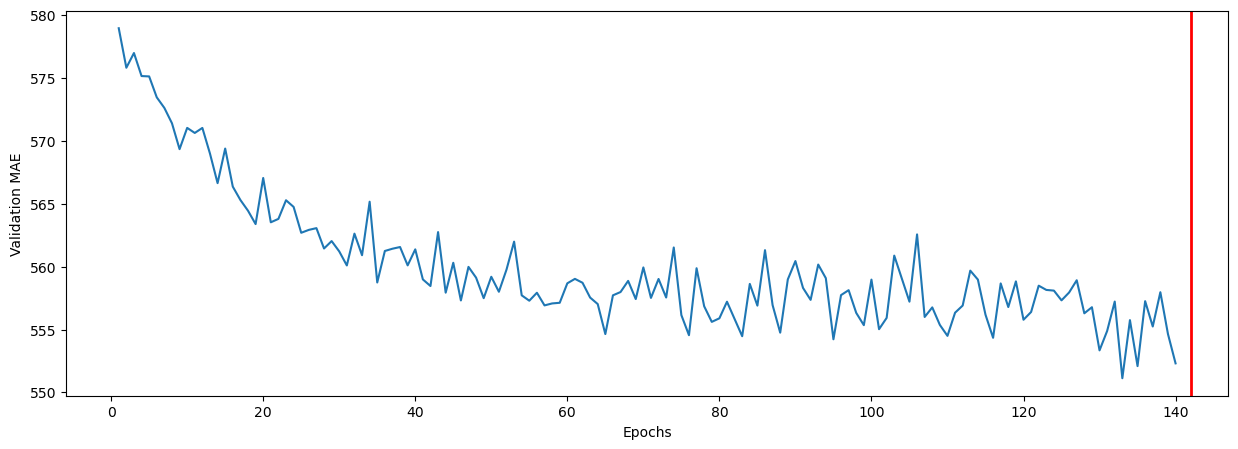

In [103]:
mae_history = history.history['val_mae']

plot_model_mae(mae_history, np.argmin(mae_history))

In [104]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

169/169 [==============================] - 1s 4ms/step - loss: 917091.1875 - mae: 526.6548


526.6548461914062

<AxesSubplot:ylabel='Frequency'>

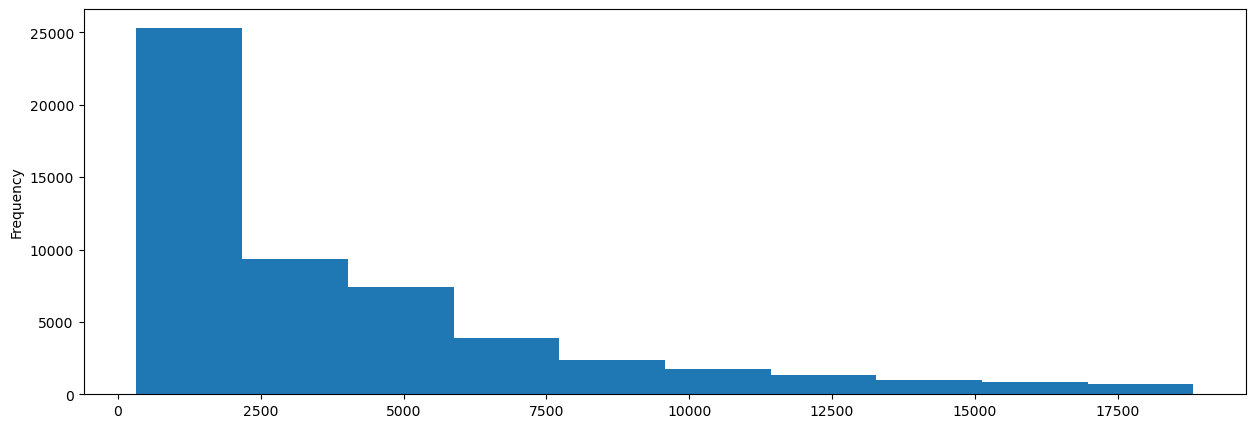

In [109]:
df.price.plot.hist()

Loss w tym przypadku jest ogromny, chociaż MAE jest na akceptowalnym poziomie. Uczenie trwało dość długo czasu więc lepiej w tym wypadku ograniczyć nieco zbiór wykorzystywany do uczenia.  

### Zmniejszenie ilości danych i kolejne podejście do uczenia

In [110]:
# set how many rows to use 
data_size = 10000

# In the first step we will split the data in training and remaining dataset
train_data, rem_data, train_targets, rem_targets = train_test_split(X[:10000],y[:10000], train_size=0.8, random_state=42)

# split remaining data to test and validation sets
test_size=0.5
val_data, test_data, val_targets, test_targets = train_test_split(rem_data,rem_targets, test_size=test_size, random_state=42) 

In [111]:
num_epochs = 50

model = build_model()
history = model.fit(train_data, train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=16, verbose=0)

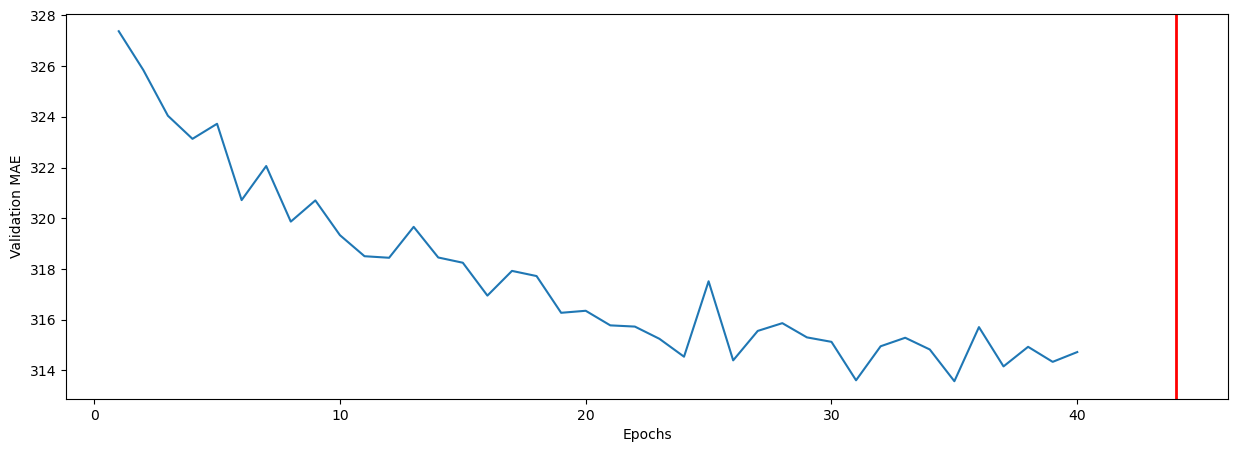

In [112]:
mae_history = history.history['val_mae']

plot_model_mae(mae_history, np.argmin(mae_history))

In [113]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

32/32 [==============================] - 0s 4ms/step - loss: 139461.5781 - mae: 293.6982


293.6981506347656

#### Po zmniejszeniu wyniki okazały się o wiele lepsze, chociaż los nadal jest bardzo duży. Niestety okazuje się, że pierwsze 10 000 rekordów nie są zbiorem reprezentacyjnym (wizualizacja poniżej).

<AxesSubplot:ylabel='Frequency'>

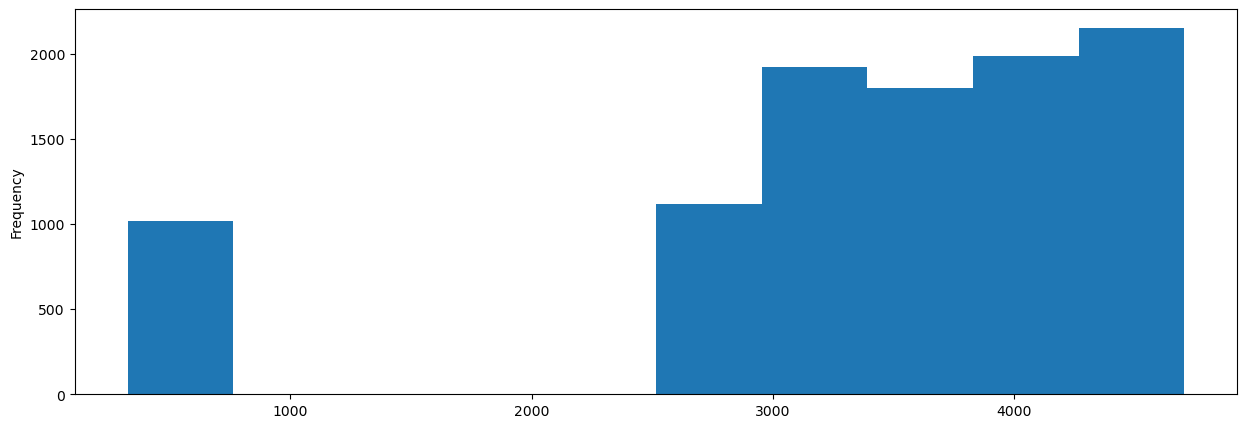

In [115]:
df.price[:10000].plot.hist()

<AxesSubplot:ylabel='Frequency'>

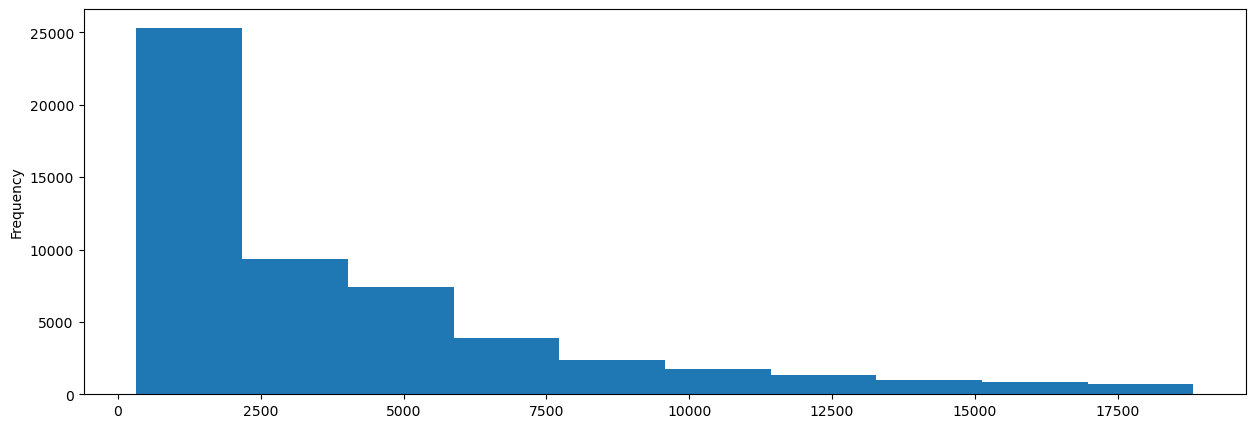

In [120]:
df.price.plot.hist()

In [123]:
# set how many rows to use as fraction 
data_size = 10000 / len(df.index)

# In the first step we will split the data in training and remaining dataset
train_data, rem_data, train_targets, rem_targets = train_test_split(X, y, train_size=0.8*data_size, test_size=0.2*data_size, random_state=42)

# split remaining data to test and validation sets
test_size=0.5
val_data, test_data, val_targets, test_targets = train_test_split(rem_data,rem_targets, test_size=test_size, random_state=42) 

<AxesSubplot:ylabel='Frequency'>

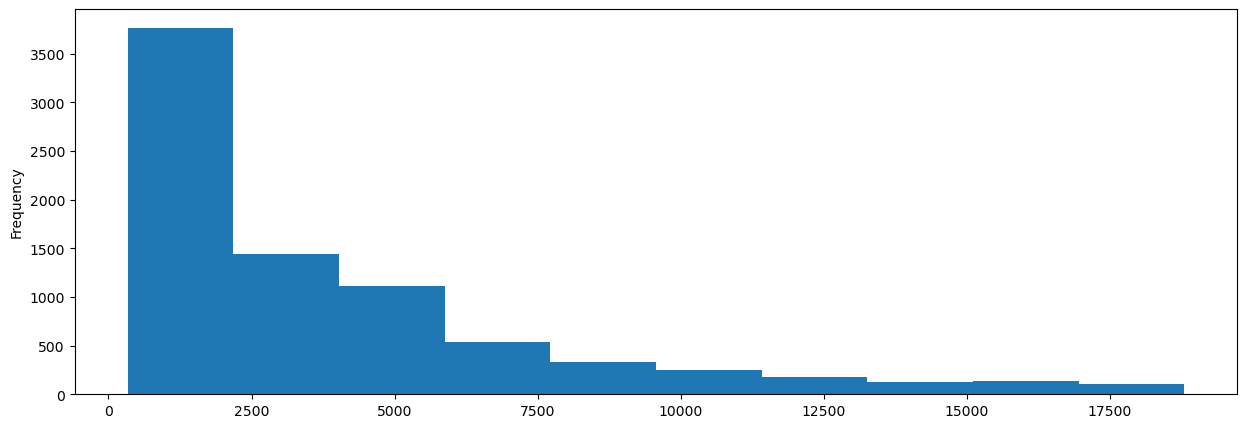

In [124]:
train_targets.plot.hist()

#### Teraz dane treningowe i testowe posiadają o wiele bardziej zbliżony rozkład do pierwotnego zbioru.

In [129]:
num_epochs = 300

model = build_model()
history = model.fit(train_data, train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=16, verbose=0)

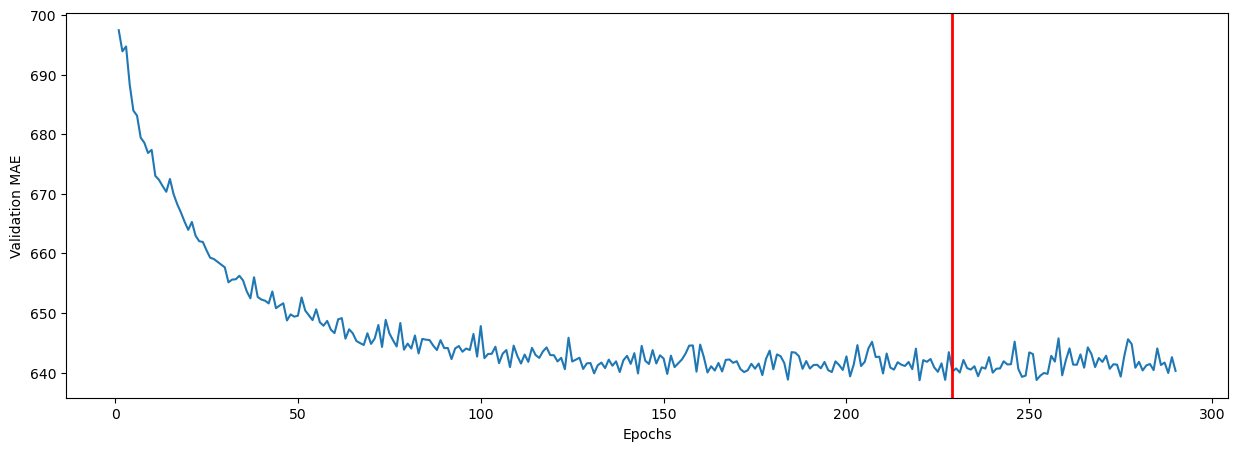

In [130]:
mae_history = history.history['val_mae']

plot_model_mae(mae_history, np.argmin(mae_history))

In [131]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

32/32 [==============================] - 0s 4ms/step - loss: 1063426.5000 - mae: 581.4421


581.4420776367188

### MAE wygląda wiarygodnie, niestety nadal występuje duży loss. Pora zmienić architekturę sieci.

In [138]:
def build_model():
    # Because we will need to instantiate the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(192, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [139]:
model = build_model()
num_epochs = 500
history = model.fit(train_data, train_targets,
                            validation_data=(val_data, val_targets),
                            epochs=num_epochs, batch_size=32, verbose=0)

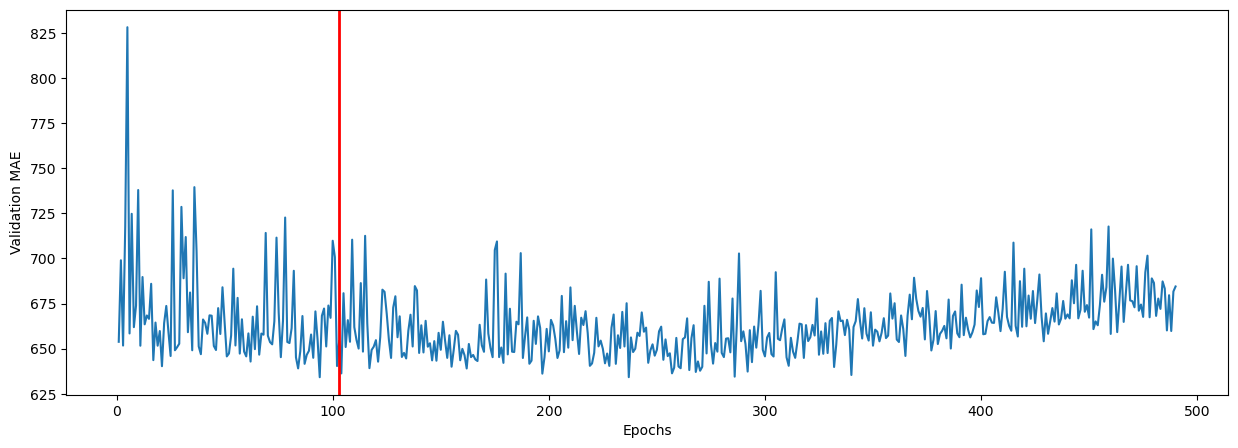

In [140]:
mae_history = history.history['val_mae']

plot_model_mae(mae_history, np.argmin(mae_history))

In [141]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

32/32 [==============================] - 0s 4ms/step - loss: 1736983.7500 - mae: 680.0534


680.0534057617188

### Funkcja straty to MAE^2 (MSE) dlatego osiąga tak duże wartości. Na ten moment nejlepsze wyniki dostarczył model pierwszy, lecz na pewno jest jeszcze miejsce na jego poprawę. 